In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

#base_path = r"/Users/gsbezerra/source/junior/junior-homecat-training/results"
base_path = r"D:\source\\junior\\junior-homecat-training\\results"

classes = ["NENHUM", "HELENO", "PITUTA", "REGINALDO"]


from tensorflow import keras

from keras import applications

model_path = base_path+'/home-cat-model-2'

model = keras.models.load_model(model_path)



1/1 [==============================] - 0s 275ms/step
NENHUM: 0.00%
HELENO: 0.00%
PITUTA: 100.00%
REGINALDO: 0.00%


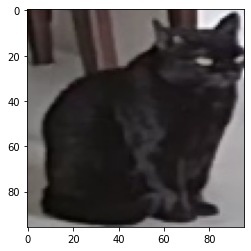

In [5]:
DIM = 96

image_path = "/HELENO/0a06a4e6-b4f2-4533-a96b-287fc77999e9-20220714-195524.jpg" #heleno
#image_path = "/REGINALDO/0a0bee39-a65c-4572-952e-658a05641248-20220714-102220.jpg" #reginaldo
image_path = "/PITUTA/0c52b433-9d96-4c69-b4f6-284aa4c5d598-20220714-081556.jpg" #pituta
#image_path = "/NENHUM/0d056c4b-35fd-4d78-80fd-6db43e7244e2-20220716-175605.jpg" #bg

image_path = base_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image/255, dtype="float32")

image = image.reshape(1,DIM,DIM,3)

preds = model.predict(image)

for i in range(len(classes)):
    print("{}: {:.2f}%".format(classes[i], preds[0][i]*100))

In [6]:
import tensorflow as tf

tflite = "home-cat-model-2.tflite"

with open(base_path+"/"+tflite, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

NENHUM: -128.00
HELENO: -128.00
PITUTA: 127.00
REGINALDO: -128.00


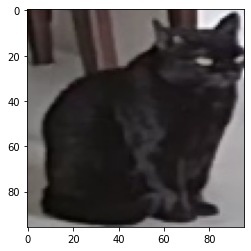

In [10]:
import numpy as np

image_path = "/HELENO/0a06a4e6-b4f2-4533-a96b-287fc77999e9-20220714-195524.jpg" #heleno
#image_path = "/REGINALDO/0a0bee39-a65c-4572-952e-658a05641248-20220714-102220.jpg" #reginaldo
image_path = "/PITUTA/0c52b433-9d96-4c69-b4f6-284aa4c5d598-20220714-081556.jpg" #pituta

#image_path = "/NENHUM/0d056c4b-35fd-4d78-80fd-6db43e7244e2-20220716-175605.jpg" #bg

image_path = base_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image-128, dtype="int8")

image = image.reshape(1,DIM,DIM,3)

interpreter.set_tensor(input_index, image)

interpreter.invoke()

preds = interpreter.get_tensor(output_index)


for i in range(len(classes)):
    print("{}: {:.2f}".format(classes[i], preds[0][i]))

    
